In [22]:
# Data Analysis on Energy Data for World Countries 
## Import all the packages and import the dataframe called 'cars'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('World Energy Consumption.csv')
## Filter database for only years after 1945
df = df.loc[df['year'] >= 1945]
print(df.head())
print(df['country'])

   iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
45      AFG  Afghanistan  1945                   NaN                 0.000   
46      AFG  Afghanistan  1946                   NaN                 0.000   
47      AFG  Afghanistan  1947                   NaN                 0.000   
48      AFG  Afghanistan  1948                   NaN                 0.000   
49      AFG  Afghanistan  1949                   NaN                 0.041   

    gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
45                  NaN                  NaN                  NaN   
46                  NaN                  NaN                  NaN   
47                  NaN                  NaN                  NaN   
48                  NaN                  NaN                  NaN   
49                  NaN                  NaN                  NaN   

    oil_prod_change_twh  energy_cons_change_pct  ...  solar_elec_per_capita  \
45                  NaN              

In [84]:
## Filter for countries of interest
countries_of_interest = ['France','Germany','Spain','Italy','United States','United Kingdom','Canada','Australia',
                         'Japan','New Zealand','Netherlands','Sweden','Switzerland','Belgium','Denmark','Israel',
                         'Singapore','Iceland','Ireland','Poland',
                         'Brazil','Argentina','Peru','Chile','China','India','Ukraine','Russia','Belarus','Turkey',
                         'Hungary','Mexico','Nigeria','Algeria','Indonesia','South Korea','Vietnam','Thailand',
                         'Saudi Arabia','South Africa']
#print(len(countries_of_interest))
df_countries = df[df['country'].isin(countries_of_interest)]
print(df_countries)

      iso_code  country  year  coal_prod_change_pct  coal_prod_change_twh  \
405        DZA  Algeria  1945                35.000                 0.342   
406        DZA  Algeria  1946                32.716                 0.431   
407        DZA  Algeria  1947                -4.186                -0.073   
408        DZA  Algeria  1948                 9.709                 0.163   
409        DZA  Algeria  1949                17.257                 0.317   
...        ...      ...   ...                   ...                   ...   
16804      VNM  Vietnam  2016                -7.030               -18.991   
16805      VNM  Vietnam  2017                -0.842                -2.114   
16806      VNM  Vietnam  2018                 9.472                23.587   
16807      VNM  Vietnam  2019                10.206                27.823   
16808      VNM  Vietnam  2020                   NaN                   NaN   

       gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
405

In [87]:
## Filter for columns of interest and rename columns for readability
#columns_of_interest = ['iso_code','country','year','biofuel_elec_per_capita','biofuel_consumption','biofuel_cons_per_capita','carbon_intensity_elec','coal_consumption','coal_elec_per_capita','coal_cons_per_capita','electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','renewables_electricity','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_share_energy','fossil_fuel_consumption','fossil_energy_per_capita','fossil_cons_per_capita','fossil_share_elec','gas_consumption','gas_elec_per_capita','gas_energy_per_capita','hydro_consumption','hydro_elec_per_capita','hydro_energy_per_capita','low_carbon_share_elec','low_carbon_electricity','low_carbon_elec_per_capita','low_carbon_share_energy','low_carbon_consumption','low_carbon_energy_per_capita','nuclear_consumption','nuclear_elec_per_capita','nuclear_energy_per_capita','oil_consumption','oil_elec_per_capita','oil_energy_per_capita','other_renewables_elec_per_capita','other_renewables_share_elec','other_renewables_share_energy','other_renewable_consumption','other_renewables_energy_per_capita','per_capita_electricity','population','primary_energy_consumption','renewables_elec_per_capita','renewables_share_elec','renewables_share_energy','renewables_consumption','renewables_energy_per_capita','solar_consumption','solar_elec_per_capita','solar_energy_per_capita','gdp','wind_consumption','wind_elec_per_capita','wind_energy_per_capita']
columns_of_interest = ['iso_code','country','year','biofuel_elec_per_capita','biofuel_consumption',
                       'biofuel_cons_per_capita','carbon_intensity_elec','coal_consumption','coal_elec_per_capita',
                       'coal_cons_per_capita','electricity_generation','biofuel_electricity','coal_electricity',
                       'fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity',
                       'oil_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity',
                       'renewables_electricity','solar_electricity','wind_electricity','energy_per_gdp',
                       'energy_per_capita','fossil_share_energy','fossil_fuel_consumption','fossil_energy_per_capita',
                       'fossil_cons_per_capita','fossil_share_elec','gas_consumption','gas_elec_per_capita',
                       'gas_energy_per_capita','hydro_consumption','hydro_elec_per_capita','hydro_energy_per_capita',
                       'low_carbon_share_elec','low_carbon_electricity','low_carbon_elec_per_capita',
                       'low_carbon_share_energy','low_carbon_consumption','low_carbon_energy_per_capita',
                       'nuclear_consumption','nuclear_elec_per_capita','nuclear_energy_per_capita',
                       'oil_consumption','oil_elec_per_capita','oil_energy_per_capita',
                       'other_renewables_elec_per_capita','other_renewables_share_elec',
                       'other_renewables_share_energy','other_renewable_consumption',
                       'other_renewables_energy_per_capita','per_capita_electricity','population',
                       'primary_energy_consumption','renewables_elec_per_capita','renewables_share_elec',
                       'renewables_share_energy','renewables_consumption','renewables_energy_per_capita',
                       'solar_consumption','solar_elec_per_capita','solar_energy_per_capita','gdp','wind_consumption',
                       'wind_elec_per_capita','wind_energy_per_capita']
df_interest = df_countries[columns_of_interest]

## Change column names to more readable formats
columns_proper =       ['Country Code','Country','Year','Biofuel Elec Per Capita','Biofuel Consumption',
                       'Biofuel Cons Per Capita','Carbon Intensity Elec','Coal Consumption','Coal Elec Per Capita',
                       'Coal Cons Per Capita','Electricity Generation','Biofuel Electricity','Coal Electricity',
                       'Fossil Electricity','Gas Electricity','Hydro Electricity','Nuclear Electricity',
                       'Oil Electricity','Other Renewable Electricity','Other Renewable Exc Biofuel Electricity',
                       'Renewables Electricity','Solar Electricity','Wind Electricity','Energy Per Gdp',
                       'Energy Per Capita','Fossil Share Energy','Fossil Fuel Consumption','Fossil Energy Per Capita',
                       'Fossil Cons Per Capita','Fossil Share Elec','Gas Consumption','Gas Elec Per Capita',
                       'Gas Energy Per Capita','Hydro Consumption','Hydro Elec Per Capita','Hydro Energy Per Capita',
                       'Low Carbon Share Elec','Low Carbon Electricity','Low Carbon Elec Per Capita',
                       'Low Carbon Share Energy','Low Carbon Consumption','Low Carbon Energy Per Capita',
                       'Nuclear Consumption','Nuclear Elec Per Capita','Nuclear Energy Per Capita','Oil Consumption',
                       'Oil Elec Per Capita','Oil Energy Per Capita','Other Renewables Elec Per Capita',
                       'Other Renewables Share Elec','Other Renewables Share Energy','Other Renewable Consumption',
                       'Other Renewables Energy Per Capita','Per Capita Electricity','Population',
                       'Primary Energy Consumption','Renewables Elec Per Capita','Renewables Share Elec',
                       'Renewables Share Energy','Renewables Consumption','Renewables Energy Per Capita',
                       'Solar Consumption','Solar Elec Per Capita','Solar Energy Per Capita','GDP','Wind Consumption',
                       'Wind Elec Per Capita','Wind Energy Per Capita']
df_interest.columns = columns_proper

## Reorder columns for readability
columns_ordered =      ['Country Code','Country','Year','Population','GDP','Energy Per Gdp','Primary Energy Consumption','Energy Per Capita','Electricity Generation','Per Capita Electricity','Carbon Intensity Elec','Biofuel Electricity','Biofuel Elec Per Capita','Biofuel Consumption','Biofuel Cons Per Capita','Nuclear Electricity','Nuclear Elec Per Capita','Nuclear Consumption','Nuclear Energy Per Capita','Solar Electricity','Solar Elec Per Capita','Solar Consumption','Solar Energy Per Capita','Wind Electricity','Wind Elec Per Capita','Wind Consumption','Wind Energy Per Capita','Hydro Electricity','Hydro Elec Per Capita','Hydro Consumption','Hydro Energy Per Capita','Coal Electricity','Coal Elec Per Capita','Coal Consumption','Coal Cons Per Capita','Gas Electricity','Gas Elec Per Capita','Gas Consumption','Gas Energy Per Capita','Oil Electricity','Oil Elec Per Capita','Oil Consumption','Oil Energy Per Capita','Fossil Electricity','Fossil Share Elec','Fossil Fuel Consumption','Fossil Cons Per Capita','Fossil Share Energy','Fossil Energy Per Capita','Low Carbon Electricity','Low Carbon Share Elec','Low Carbon Elec Per Capita','Low Carbon Share Energy','Low Carbon Consumption','Low Carbon Energy Per Capita','Renewables Electricity','Renewables Elec Per Capita','Renewables Share Elec','Renewables Share Energy','Renewables Consumption','Renewables Energy Per Capita','Other Renewable Electricity','Other Renewables Elec Per Capita','Other Renewables Share Elec','Other Renewables Share Energy','Other Renewable Consumption','Other Renewables Energy Per Capita','Other Renewable Exc Biofuel Electricity']
df_clean = df_interest[columns_ordered]

## Print out result
print(df_clean.head())

df_clean.to_csv('World Energy Consumption w. SA cleaned.csv')

    Country Code  Country  Year  Population  GDP  Energy Per Gdp  \
405          DZA  Algeria  1945   8303331.0  NaN             NaN   
406          DZA  Algeria  1946   8408386.0  NaN             NaN   
407          DZA  Algeria  1947   8514770.0  NaN             NaN   
408          DZA  Algeria  1948   8622500.0  NaN             NaN   
409          DZA  Algeria  1949   8731594.0  NaN             NaN   

     Primary Energy Consumption  Energy Per Capita  Electricity Generation  \
405                         NaN                NaN                     NaN   
406                         NaN                NaN                     NaN   
407                         NaN                NaN                     NaN   
408                         NaN                NaN                     NaN   
409                         NaN                NaN                     NaN   

     Per Capita Electricity  ...  Renewables Share Energy  \
405                     NaN  ...                      NaN   


In [86]:
## split countries into 2 groups: Developed and Developing countries
developed = ['France','Germany','Spain','Italy','United States','United Kingdom','Canada','Australia',
                         'Japan','New Zealand','Netherlands','Sweden','Switzerland','Belgium','Denmark','Israel',
                         'Singapore','Iceland','Ireland','Poland']
developing = ['Brazil','Argentina','Peru','Chile','China','India','Ukraine','Russia','Belarus','Turkey',
                         'Hungary','Mexico','Nigeria','Algeria','Indonesia','South Korea','Vietnam','Thailand',
                         'Saudi Arabia','South Africa']

In [64]:
## Begin exploratory data analysis
## create a sub dataframe to measure just USA metrics
usa_gdp = df_clean[df_clean['Country'] == 'United States']
print(usa_gdp.columns)

Index(['Country Code', 'Country', 'Year', 'Population', 'GDP',
       'Energy Per Gdp', 'Primary Energy Consumption', 'Energy Per Capita',
       'Electricity Generation', 'Per Capita Electricity',
       'Carbon Intensity Elec', 'Biofuel Electricity',
       'Biofuel Elec Per Capita', 'Biofuel Consumption',
       'Biofuel Cons Per Capita', 'Nuclear Electricity',
       'Nuclear Elec Per Capita', 'Nuclear Consumption',
       'Nuclear Energy Per Capita', 'Solar Electricity',
       'Solar Elec Per Capita', 'Solar Consumption', 'Solar Energy Per Capita',
       'Wind Electricity', 'Wind Elec Per Capita', 'Wind Consumption',
       'Wind Energy Per Capita', 'Hydro Electricity', 'Hydro Elec Per Capita',
       'Hydro Consumption', 'Hydro Energy Per Capita', 'Coal Electricity',
       'Coal Elec Per Capita', 'Coal Consumption', 'Coal Cons Per Capita',
       'Gas Electricity', 'Gas Elec Per Capita', 'Gas Consumption',
       'Gas Energy Per Capita', 'Oil Electricity', 'Oil Elec Per Capita

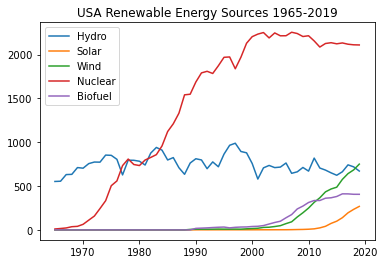

In [83]:
fig,ax = plt.subplots()
ax.plot(usa_gdp['Year'],usa_gdp['Hydro Consumption'], label='Hydro')
ax.plot(usa_gdp['Year'],usa_gdp['Solar Consumption'], label='Solar')
ax.plot(usa_gdp['Year'],usa_gdp['Wind Consumption'], label='Wind')
ax.plot(usa_gdp['Year'],usa_gdp['Nuclear Consumption'], label='Nuclear')
ax.plot(usa_gdp['Year'],usa_gdp['Biofuel Consumption'], label='Biofuel')
plt.title('USA Renewable Energy Sources 1965-2019')
plt.legend()
plt.show()